In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

from sklearn.datasets import fetch_california_housing
X, y  = fetch_california_housing(return_X_y=True, as_frame=True)

In [2]:
print(X.shape)
print(y.shape)

(20640, 8)
(20640,)


In [3]:
# train_test_split jeu de train / jeu de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True, random_state = 0) # pas de stratify car pas de classif

In [4]:
# Standardisation du jeu de train
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scld = sc.fit_transform(X_train)
X_train_scld

array([[ 0.19001247, -1.79507596,  0.90771428, ...,  0.07408222,
        -0.8400624 ,  1.00389865],
       [ 0.26931072,  1.85553889, -0.04200187, ...,  0.04527606,
         0.98536392, -1.43477229],
       [ 0.02989505, -0.20785212, -0.30282448, ..., -0.03933216,
        -0.8400624 ,  0.77948108],
       ...,
       [-0.35589721,  0.18895385, -0.70992683, ..., -0.19238342,
         0.44709718, -1.1654712 ],
       [ 0.92053182,  0.42703742, -0.35350337, ..., -0.12150865,
        -0.93835459,  0.81439048],
       [-1.30490629, -1.08082523, -0.59566992, ...,  0.06298936,
        -1.32216217,  1.99632302]])

In [5]:
# Recherche des meilleurs hyperparamètres avec GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {'hidden_layer_sizes': [(5,), (8,), (10,), (15,)],
                    'activation': ['identity', 'logistic', 'tanh', 'relu']}

# Créez un modèle MLPRegressor
model = MLPRegressor(solver='lbfgs', alpha=0.0001, max_iter=10000, random_state=0, max_fun=15000)

# Créez une instance GridSearchCV pour rechercher les meilleurs hyperparamètres
grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)

# Effectuez la recherche sur les hyperparamètres
grid_search.fit(X_train_scld, y_train)

# Obtenez les meilleurs hyperparamètres
best_params = grid_search.best_params_

# Affichez les résultats
print("Meilleurs hyperparamètres:", best_params)

Meilleurs hyperparamètres: {'activation': 'tanh', 'hidden_layer_sizes': (15,)}


In [6]:
# Entrainement du modèle MLPRegressor avec les meilleurs hyperparamètres
model_mlpr = MLPRegressor(hidden_layer_sizes=(15,), activation='tanh', solver='lbfgs', alpha=0.0001, max_iter=10000, random_state=0, max_fun=15000)
model_mlpr.fit(X_train_scld, y_train)

MLPRegressor(activation='tanh', hidden_layer_sizes=(15,), max_iter=10000,
             random_state=0, solver='lbfgs')

In [7]:
# Prédictions - jeu de train
ypred_train = model_mlpr.predict(X_train_scld)

In [8]:
# Performances - jeu de train
# R2 score
from sklearn.metrics import r2_score, mean_squared_error
r2score_train = r2_score(y_train, ypred_train)
print("R2 score sur le jeu de train:", r2score_train)
# Calcul de la rmse
rmse_train = mean_squared_error(y_train, ypred_train, squared=False)
print("RMSE sur le jeu de train :", rmse_train)

R2 score sur le jeu de train: 0.8037002446867682
RMSE sur le jeu de train : 0.5125641404222444


In [9]:
# Standardisation des données - jeu de test
X_test_scld = sc.transform(X_test)
X_test_scld

array([[ 1.44489405e-01, -5.25296884e-01,  9.13337520e-02, ...,
         1.78551337e-01, -1.42513494e+00,  1.25325150e+00],
       [ 9.98204241e-01,  2.68315039e-01,  2.67351908e-01, ...,
        -1.48094957e-03, -7.97937179e-01,  7.94442248e-01],
       [ 2.47755440e-01,  3.02314620e-02,  1.97399137e-01, ...,
        -1.86932108e-02,  1.41597731e+00, -1.13554886e+00],
       ...,
       [-3.53274909e-01, -1.39827000e+00, -6.20341805e-02, ...,
        -6.56957889e-02,  1.51426949e+00, -6.76739606e-01],
       [ 1.18910742e+00, -8.42741654e-01,  7.49373432e-01, ...,
        -2.54935860e-02,  1.09301727e+00, -1.19040649e+00],
       [-2.85147647e-01,  1.85553889e+00, -6.10691521e-01, ...,
         8.85661224e-02, -7.04325572e-01,  6.79739934e-01]])

In [10]:
# Prédictions - jeu de test
ypred_test = model_mlpr.predict(X_test_scld)

In [11]:
# Performances - jeu de test
# R2 score
r2score_test = r2_score(y_test, ypred_test)
print("R2 score sur le jeu de test:", r2score_test)
# Calcul de la rmse
rmse_test = mean_squared_error(y_test, ypred_test, squared=False)
print("RMSE sur le jeu de train :", rmse_test)

R2 score sur le jeu de test: 0.7872547275981304
RMSE sur le jeu de train : 0.526697485177887


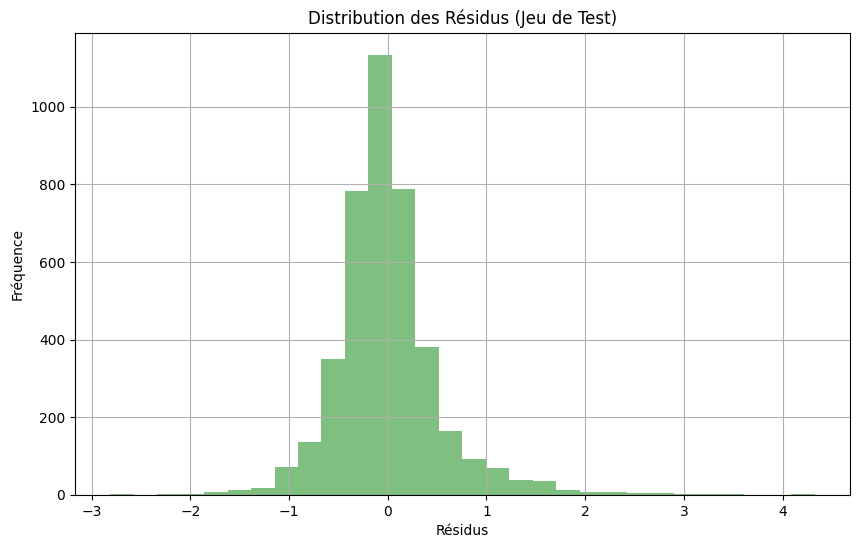

In [13]:
# Tracer un graphique de distribution des résidus pour le jeu de données de test
residuals = y_test - ypred_test
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color='green', alpha=0.5)
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.title('Distribution des Résidus (Jeu de Test)')
plt.grid(True)
plt.show()

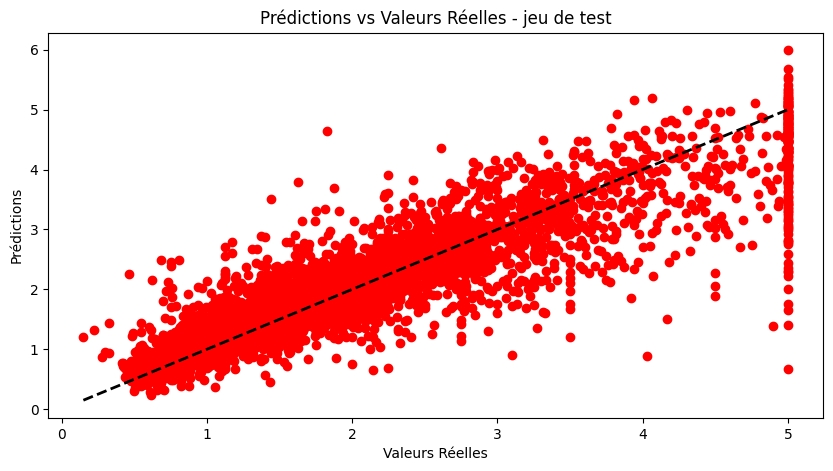

In [15]:
# Prédictions vs Valeurs Réelles - jeu de test
plt.figure(figsize=(10, 5))
plt.scatter(y_test, ypred_test, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prédictions')
plt.title('Prédictions vs Valeurs Réelles - jeu de test')
plt.show()

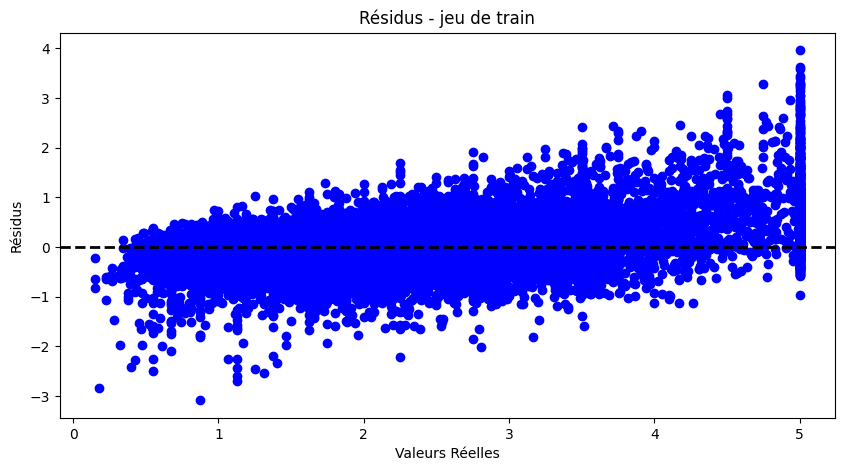

In [16]:
# Résidus - jeu de train
residuals_train = y_train - ypred_train
plt.figure(figsize=(10, 5))
plt.scatter(y_train, residuals_train, color='blue')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Résidus')
plt.title('Résidus - jeu de train')
plt.axhline(y=0, color='k', linestyle='--', lw=2)
plt.show()

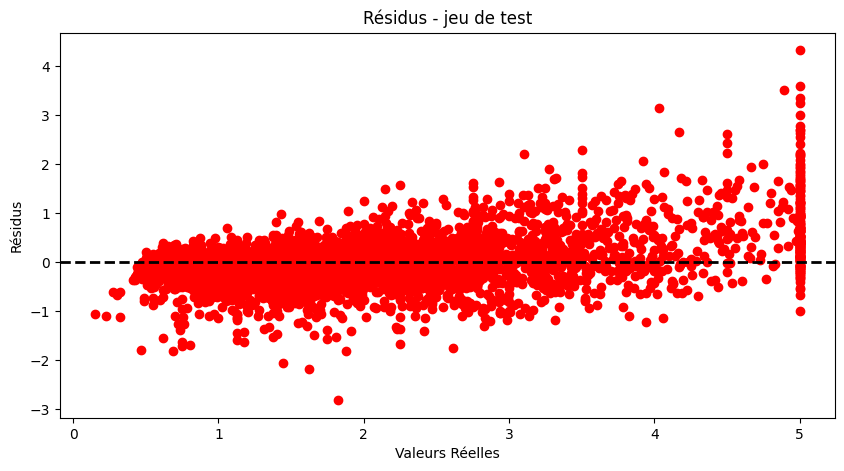

In [17]:
# Résidus - jeu de test
residuals_test = y_test - ypred_test
plt.figure(figsize=(10, 5))
plt.scatter(y_test, residuals_test, color='red')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Résidus')
plt.title('Résidus - jeu de test')
plt.axhline(y=0, color='k', linestyle='--', lw=2)
plt.show()